In [1]:
import json
import re
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA 
vectorizer=CountVectorizer()

In [2]:
import numpy as np
import itertools
from sklearn import mixture
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
def getdata(path): #get the data
    text = []
    with open(path,'r') as load_f:
     load_dict = json.load(load_f)
    for i in range(0,len(load_dict['result']['docs'])):
        text.append(load_dict['result']['docs'][i]['content'])
    return text # return a list

In [4]:
def singleadd(CurrentList, TotalList):#Distinct the data and merage
    for i in range(0,len(CurrentList)):
        num = 0
        for j in range(0,len(TotalList)):
            if CurrentList[i] == TotalList[j]:
                num = 1
                break
            else:
                continue
        if num == 0:
            TotalList.append(CurrentList[i])

    return TotalList  # return a list


In [5]:
def Tf_Idf(sentence):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentence)
    word = vectorizer.get_feature_names()
    print(word)
    print(X.toarray())
    transformer = TfidfTransformer()
    print (transformer)
    tfidf = transformer.fit_transform(X)
    print (tfidf.toarray())

In [32]:
def RemovePunct(line): #remove punctuation
    #identify = str.maketrans('', '')
    delEStr = string.punctuation +string.digits  #symbols
    CleanLine = []
    for i in range(0,len(line)):
        temp = []
        for j in range(0,len(line[i])):
                temp1 = ( re.sub(r'http://[a-zA-Z0-9.?/&=:]*','',line[i][j]))
                temp.append(re.sub(r'[^a-zA-Z]',' ',temp1))
        strtemp = ' '.join(temp)
        CleanLine.append(strtemp)
#         CleanLine.append(re.sub(r'[^a-zA-Z]',' ',temp))
                # if temp != '':
                #     CleanLine.append(temp)

    return CleanLine

In [34]:
CleanList = RemovePunct(SentenceList)
CleanList

['     Synchron Conference Wrap June         The enthusiasm and engagement shown by a roomful of risk focused advisers at the      Synchron Conference was a refreshing affirmation of both the value advisers already deliver to their clients and the acknowledgement that every adviser can find a better way to add that value and to run a better business  Conducted every two years  this Conference sets a benchmark in Australia  especially for the life insurance advice proposition  in terms of focus on best business practices and personal development  Keynote speaker  Lisa McInnes Smith  spoke about what every day courage really means  Senior representatives from every retail insurer attended the Conference in force  which is another indicator of the importance of this event  held this year in San Francisco for      delegates comprising advisers  partners  other family members and life company stakeholders  Presentations were made by a cross section of industry specific contributors as well 

In [7]:
def SentenceToken(raw):#setencetokenize
    sent_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = []
    for i in range(0,len(raw)):
        sentences.append(sent_tokenizer.tokenize(raw[i]))
    return  sentences

In [8]:
def WordToken(sentence):#
    word=[]
    for i in range(0,len(sentence)):

            wordsInStr = nltk.word_tokenize(sentence[i])
            word.append(wordsInStr)

    return word

In [9]:
def CountWord(WordList):
    WordCount = {}
    for i in range(0,len(WordList)):
        for j in range(0,len(WordList[i])):
            if WordCount.__contains__( WordList[i][j]):
                WordCount[WordList[i][j]] +=1
            else:
                WordCount[WordList[i][j]] = 1
    pass # 统计词频
    return WordCount

In [10]:
def RemoveStopWord(WordList):
    cleanWords=[]
    for words in WordList:
        cleanWords+= [[w.lower() for w in words if w.lower() not in stopwords.words('english') ]]
    return cleanWords

In [11]:
def RemoveStop(Sentence):
    cleanWords=[]
    for i in range(0,len(Sentence)):
        wordsInStr = nltk.word_tokenize(Sentence[i])
        temp = ' '.join([w.lower() for w in wordsInStr if w.lower() not in stopwords.words('english') ])
        cleanWords.append(temp)
    return cleanWords

In [12]:
path_r3_1 = "/Users/luca/Documents/capstone/r3/60da7349ce56c8d1267f0f5d93429878.json"
path_r3_2 = "/Users/luca/Documents/capstone/r3/8debf40a57f08eb15fc18e31f8eb3b57.json"
path_r3_3 = "/Users/luca/Documents/capstone/r3/ecaa4b9dc789533bfc3c2b89773b25d3.json"
path_r3_4 = "/Users/luca/Documents/capstone/r3/fa4335c5ce3b3d4d27d44068a48ae552.json"
path_r3_5 = "/Users/luca/Documents/capstone/r3/fc3efca018f3bc59b3a33925b488784d.json"
TotalTextList = [] #corpus

In [13]:
TextList1 = getdata(path_r3_1) # get the data from json
TextList2 = getdata(path_r3_2)
TextList3 = getdata(path_r3_3)
TextList4 = getdata(path_r3_4)
TextList5 = getdata(path_r3_5)

In [14]:
TotalTextList = singleadd(TextList1,TotalTextList)
TotalTextList = singleadd(TextList2,TotalTextList)
TotalTextList = singleadd(TextList3,TotalTextList)
TotalTextList = singleadd(TextList4,TotalTextList)
TotalTextList = singleadd(TextList5,TotalTextList)

In [15]:
SentenceList = SentenceToken(TotalTextList)

In [16]:
SentenceList[0]

['2018 Synchron Conference Wrap\nJune 2, 2018 The enthusiasm and engagement shown by a roomful of risk focused advisers at the 2018 Synchron Conference was a refreshing affirmation of both the value advisers already deliver to their clients and the acknowledgement that every adviser can find a better way to add that value and to run a better business.',
 'Conducted every two years, this Conference sets a benchmark in Australia, especially for the life insurance advice proposition, in terms of focus on best business practices and personal development.',
 'Keynote speaker, Lisa McInnes-Smith, spoke about what every-day courage really means… Senior representatives from every retail insurer attended the Conference in force, which is another indicator of the importance of this event, held this year in San Francisco for 300+ delegates comprising advisers, partners, other family members and life company stakeholders.',
 'Presentations were made by a cross section of industry-specific contribu

In [21]:
CleanList = RemovePunct(SentenceList)

['2018 Synchron Conference Wrap\nJune 2, 2018 The enthusiasm and engagement shown by a roomful of risk focused advisers at the 2018 Synchron Conference was a refreshing affirmation of both the value advisers already deliver to their clients and the acknowledgement that every adviser can find a better way to add that value and to run a better business.', 'Conducted every two years, this Conference sets a benchmark in Australia, especially for the life insurance advice proposition, in terms of focus on best business practices and personal development.', 'Keynote speaker, Lisa McInnes-Smith, spoke about what every-day courage really means… Senior representatives from every retail insurer attended the Conference in force, which is another indicator of the importance of this event, held this year in San Francisco for 300+ delegates comprising advisers, partners, other family members and life company stakeholders.', 'Presentations were made by a cross section of industry-specific contributor

In [ ]:
CleanList

In [35]:
#
# #Tf_Idf(CleanList)
#WordList= WordToken(CleanList)
#

#NoStopWord = RemoveStopWord(WordList)
CleanStop = RemoveStop(CleanList)
print(CleanStop)


['synchron conference wrap june enthusiasm engagement shown roomful risk focused advisers synchron conference refreshing affirmation value advisers already deliver clients acknowledgement every adviser find better way add value run better business conducted every two years conference sets benchmark australia especially life insurance advice proposition terms focus best business practices personal development keynote speaker lisa mcinnes smith spoke every day courage really means senior representatives every retail insurer attended conference force another indicator importance event held year san francisco delegates comprising advisers partners family members life company stakeholders presentations made cross section industry specific contributors well presenters focused generic broader based issues relating business building sales strategies relationship management personal development loving synchron conference polo shirts well sort integral shape conference social element fits comfor

In [36]:
# WordCount = CountWord(NoStopWord)
data = vectorizer.fit_transform(CleanStop).toarray()
#print(WordCount)
#vectorizer.fit_transform()

In [46]:
pca=PCA(n_components=10)
newData=pca.fit_transform(data)

In [47]:
gmmModel = mixture.GaussianMixture(n_components=5, covariance_type='diag')
gmmModel.fit(newData)
labels = gmmModel.predict(newData)
print(labels)

[1 1 4 0 4 4 4 0 0 4 4 4 4 4 1 4 0 4 0 1 0 4 4 0 1 1 1 1 0 4 4 1 1 0 1 1 1
 4 1 4 4 4 1 1 4 4 4 0 4 1 1 0 4 1 4 4 1 0 1 4 4 0 0 4 4 1 4 0 4 1 4 1 4 0
 1 1 0 4 1 4 4 1 4 0 4 4 0 1 0 1 4 4 4 4 1 0 4 4 0 0 1 4 4 4 4 0 4 4 1 4 4
 4 1 0 3 4 0 4 1 4 0 4 0 0 4 4 4 4 4 4 4 4 1 1 1 0 4 0 4 4 0 1 4 1 4 1 4 4
 0 0 4 0 0 0 4 1 4 0 0 1 0 4 0 1 4 1 4 4 1 1 1 4 4 4 4 0 1 0 0 1 4 4 4 4 4
 1 0 1 4 4 0 0 4 4 0 4 0 4 4 0 4 0 0 4 4 4 4 4 4 4 0 0 4 1 1 4 1 4 4 4 4 4
 4 4 4 4 4 1 4 1 4 4 4 1 4 4 4 4 1 0 4 1 4 1 4 0 4 3 0 1 4 4 4 1 1 1 0 1 4
 4 4 4 0 1 1 1 4 4 4 1 1 4 4 0 4 0 1 1 4 1 0 1 4 4 1 1 4 1 4 1 1 4 4 1 4 4
 4 4 4 1 4 1 4 4 1 0 4 2 2 4 1 4 0 0 4 4 4 4 0 4 1 4 4 1 0 1 4 4 1 4 0 0 4
 4 1 1 0 4 4 4 4 4 4 4 4 4 4 4 0 4 0 4 4 1 4 4 4 4 1 4 1 4 4 4 0 1 4 4 1 0
 4 0 0 4 1 4 0 4 4 1 4 4 4 0 4 4 1 4 0 4 1 1 4 4 4 4 0 4 4 4 4 1 0 0 0 0 4
 0 4 0 1 4 4 4 4 0 4 4 1 4 4 4 0 4 0 1 4 4 4 0 4 4 4 4 4 1 0 0 4 4 4 1 4 4
 1 4 4 4 4 4 0 0 1 0 4 4 2 4 4 4 4 4 0 0 4 4 0 4 4 0 4 4 1 4 4 4 1 4 4 0 1
 4 1 4 1 4 4 1 1 1 1 1 1 

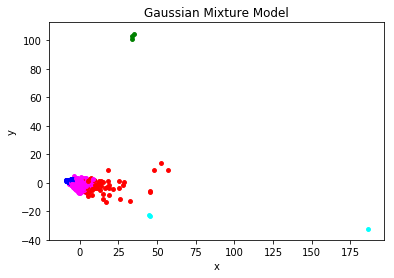

[[ 9.91120825e+00 -1.23970208e+00  5.46472603e-01 -1.47159393e-01
  -4.34549300e+00  3.19829246e+00  3.24997913e+00  9.49462227e-01
  -3.10595997e+00 -1.89522168e-01]
 [-5.90543386e+00  1.37589074e+00  3.09579367e+00  8.80937035e-01
   3.81360107e-02 -9.90145619e-01 -2.09756782e+00 -7.98403982e-02
   1.53987398e+00  4.26807207e-01]
 [ 3.41694310e+01  1.02878415e+02 -2.34818534e+01 -2.01190170e+01
   7.15173356e+00 -3.05307174e+00 -2.23145000e+00 -4.46409960e+00
  -5.87510254e-01  1.48375924e+00]
 [ 9.21724396e+01 -2.62640151e+01 -1.24094874e+01 -1.68090298e+01
  -4.60580274e+00 -7.28821236e+00 -3.35944827e+01 -2.56831738e+01
   1.04339758e+01 -1.26234825e+01]
 [-1.08599274e+00 -9.69519392e-01 -1.47528940e+00 -1.01473532e-01
   1.31365145e+00 -3.96818827e-01  3.75160475e-01 -1.84519102e-03
   8.70303384e-02 -6.89095194e-02]]
[[1.25783803e+02 1.74354362e+01 1.03243517e+02 1.66080749e+02
  6.13713538e+01 1.31225876e+02 8.34060787e+01 1.15216598e+02
  8.81299822e+01 8.28077128e+01]
 [3.368

In [48]:
for i in range(1,len(labels)):
    if labels[i] == 0:
        plt.scatter(newData[i, 0], newData[i, 1], s=15, c='red')
    elif labels[i] == 1:
        plt.scatter(newData[i, 0], newData[i, 1], s=15, c='blue')
    elif labels[i] == 2:
        plt.scatter(newData[i, 0],newData[i, 1], s=15, c='green')
    elif labels[i] == 3:
        plt.scatter(newData[i, 0], newData[i, 1], s=15, c='cyan')
#     elif labels[i] == 4:
    else:
        plt.scatter(newData[i, 0], newData[i, 1], s=15, c='magenta')
plt.title('Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(gmmModel.means_)
print(gmmModel.covariances_)